In [1]:
import spacy as scy
from google.colab import files
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Seleccionar y cargar un archivo desde tu computadora
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = list(uploaded.keys())[0]

# Realizar operaciones con el archivo cargado
# ...

# Eliminar el archivo cargado (opcional)
# files.remove(file_name)

Saving Yoli Maria Serna.txt to Yoli Maria Serna.txt


In [3]:
# Cargar el modelo en inglés
nlp = scy.load("en_core_web_sm")

# Leer el archivo de comentarios
with open("Yoli Maria Serna.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Procesar el texto con SpaCy
doc = nlp(text)

# Realizar minería de información
entities = []
nouns = []
relations = []

for entity in doc.ents:
    entities.append((entity.text, entity.label_))

for token in doc:
    if token.pos_ == "NOUN":
        nouns.append(token.text)

# Detector de relaciones
for chunk in doc.noun_chunks:
    if len(chunk) >= 2:
        relations.append((chunk.root.text, chunk.root.dep_, chunk.text))

In [4]:
# Calcular la frecuencia de palabras
word_freq = Counter()

for token in doc:
    if token.is_alpha and not token.is_stop:
        word_freq[token.text.lower()] += 1

# Calcular el total de palabras
total_words = sum(word_freq.values())

# Calcular porcentajes y obtener las palabras más comunes
common_words = word_freq.most_common(10)  # Cambia el número para obtener más o menos palabras comunes



In [5]:
# Imprimir las entidades y sustantivos encontrados
print("Entidades encontradas:")
for entity, label in entities:
    print(f"{entity} - {label}")

print("\nSustantivos encontrados:")
print(nouns)

Entidades encontradas:
Yoli - GPE
Maria Serna - PERSON
Sitios - GPE
3 - CARDINAL
Victor Arcila - PERSON
3 - CARDINAL
Alcaldía de Tuluá
Victor Arcila - PERSON
Victor - PERSON
3 - CARDINAL
Para mí - FAC
para dar - PERSON
La Paz - PERSON
La Armonía - PERSON
La Seguridad - GPE
2 - CARDINAL
Responder - ORG
Javier Alonso - PERSON
casas - GPE
un - ORG
del rio.... - GPE
reorganizar el corredor - PERSON
2 - CARDINAL
Responder - ORG
Luxora Caceres - ORG
Felicidad - GPE
40 - CARDINAL
demarcada - GPE
señalizada con - PERSON
para los - ORG
2 - CARDINAL
Fabio Gonzalez Garcia - PERSON
2 - CARDINAL
Nostradamos Los Dias - PERSON
Para - PERSON
Porque el Amor - PERSON
FELICIDAD - ORG
Estan - NORP
de TODO - PERSON
ir al interior - PERSON
cosa - GPE
el sistema n - GPE
2 - CARDINAL
Mary Flores - PERSON
Dios - ORG
Tulua - NORP
2 - CARDINAL
Manuel Ortiz
Que - PERSON
las vías - PERSON
Bosques de Maracaibo - PERSON
3 - CARDINAL
Ramiro Velez Rojas - PERSON
Feliz - PRODUCT
casa - ORG
credito acorde - PERSON
nuest

In [6]:
# Imprimir las relaciones encontradas
print("\nRelaciones encontradas:")
for head, rel, dependent in relations:
    print(f"{head} - {rel} - {dependent}")


Relaciones encontradas:
agradables - ROOT - Yoli Maria Serna
Sitios bien agradables
esparcimiento - appos - de esparcimiento
Tulua - appos - toda la margen del rio Tulua
paz - nsubj - semanas
Responder
Victor Arcila
Amor paz
Victor - dobj - bondad
3 semanas
Responder

Autor
Alcaldía de Tuluá
Victor Arcila Totalmente de acuerdo Victor
necesita - dobj - Tuluá necesita
Saludos - ROOT - ¡Saludos
Para - nsubj - 3 semanas
Responder


Luz Cenyda Vasquez Bejarano
Para
vivir - appos - la felicidad de vivir
bella - appos - mi bella
cómo - dobj - tranquilidad de salir y ver cómo
negocios - appos - la gente puede disfrutar y tener sus negocios
y - appos - para dar empleo y
familias - pobj - a las familias
Seguridad - pobj - una palabra La Paz y La Armonía La Seguridad
todo - pobj - cuentas todo
social - nsubj - se nesecita más seguridad social
casas - dobj - urbanísticas(nuevas casas
turístico - appos - un corredor turístico
demarcada - appos - 40 demarcada
con - nsubj - y señalizada con
escolare

In [7]:
# Imprimir las palabras más comunes y sus porcentajes
print("Palabras más comunes:")
for word, freq in common_words:
    percentage = (freq / total_words) * 100
    print(f"{word}: {freq} veces ({percentage:.2f}% del texto)")

Palabras más comunes:
de: 114 veces (3.72% del texto)
responder: 103 veces (3.36% del texto)
que: 95 veces (3.10% del texto)
y: 95 veces (3.10% del texto)
la: 90 veces (2.94% del texto)
los: 59 veces (1.93% del texto)
en: 58 veces (1.89% del texto)
semanas: 51 veces (1.67% del texto)
para: 50 veces (1.63% del texto)
más: 45 veces (1.47% del texto)


In [8]:
# Palabras a eliminar
stop_words = {'responder','fannylu','semhace','ocultar','hresponder','semresponder','perfil','es','una','día','dhace','dresponder','gustaresponder','díasresponder','alcaldiadetulua','ahoraresponder','le','enviar','mensaje','sin','la','sume','te','días','h','responde','filtrado','enlace','si','autor','respuestas','click','tu','u','d','contestar','relevantes','sumada','será','siguiente','algunas','puede','encuetas','encuestas','me','gusta','hacer','aquí','tulua','sem','q', 'de', 'que', 'el', 'y','en','d','a','lo','se','para','por', 'los','un','no','las','al','ser','con','del'}

word_freq = Counter()

for token in doc:
    if token.is_alpha and token.text.lower() not in stop_words:
        word_freq[token.text.lower()] += 1

# Calcular el total de palabras
total_words = sum(word_freq.values())

# Calcular porcentajes y obtener las palabras más comunes
common_words = word_freq.most_common(50)  # Cambia el número para obtener más o menos palabras comunes

In [9]:
# Imprimir las palabras más comunes y sus porcentajes
print("Palabras más comunes (excluyendo palabras no deseadas):")
for word, freq in common_words:
    percentage = (freq / total_words) * 100
    print(f"{word}: {freq} veces ({percentage:.2f}% del texto)")

Palabras más comunes (excluyendo palabras no deseadas):
semanas: 51 veces (2.54% del texto)
más: 45 veces (2.24% del texto)
ver: 27 veces (1.35% del texto)
tuluá: 23 veces (1.15% del texto)
semana: 22 veces (1.10% del texto)
seguridad: 14 veces (0.70% del texto)
ciudad: 13 veces (0.65% del texto)
sus: 12 veces (0.60% del texto)
su: 12 veces (0.60% del texto)
mi: 11 veces (0.55% del texto)
alcalde: 11 veces (0.55% del texto)
felicidad: 10 veces (0.50% del texto)
donde: 10 veces (0.50% del texto)
felices: 10 veces (0.50% del texto)
calles: 10 veces (0.50% del texto)
muy: 10 veces (0.50% del texto)
bien: 9 veces (0.45% del texto)
tener: 9 veces (0.45% del texto)
empleo: 9 veces (0.45% del texto)
necesitamos: 9 veces (0.45% del texto)
todos: 9 veces (0.45% del texto)
nos: 9 veces (0.45% del texto)
cada: 9 veces (0.45% del texto)
maria: 8 veces (0.40% del texto)
paz: 8 veces (0.40% del texto)
como: 8 veces (0.40% del texto)
todo: 7 veces (0.35% del texto)
o: 7 veces (0.35% del texto)
porque

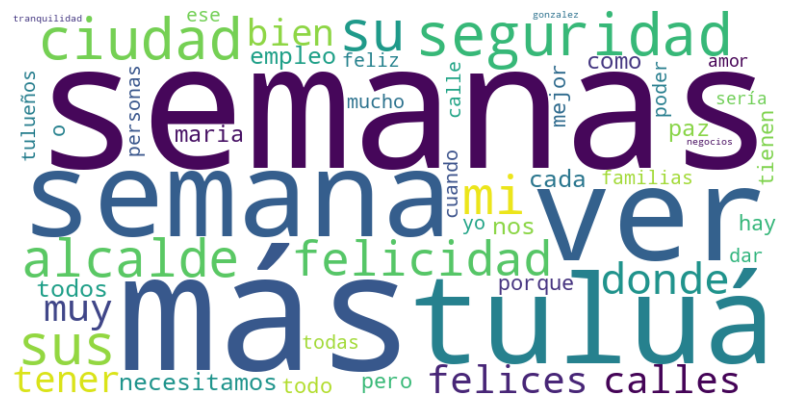

In [10]:
# Crear un diccionario de palabras y frecuencias
word_freq_dict = {word: freq for word, freq in common_words}

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Mostrar la nube de palabras utilizando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()